<img src="imgs/IISc_Master_Seal_Black_Transparent.png" height="120px" width="120px" align="right" />

<img src="imgs/logoGESS.jpg" height="120px" width="120px" align="right" />

<font face="Calibri">
<font size="7"> <b> PySHBundle Tutorials </b> </font>
<br> 
<font size="5"> <b> Tutorial 2: Introduction to Spherical Harmonics using PySHBundle<font color='rgba(200,0,0,0.2)'>  </font> </b> </font>
<br> <br>
    
<font size="3"> <b> by: Abhishek Mhamane, IIT Kanpur</b> 
<font size="2">  <br>
<font> <b>Date: </b> July 1, 2023 </font>
</font>


# What are Spherical Harmonics?

## Associated Legendre Polynomials


In [ ]:
import pyshbundle.plm
help(pyshbundle.plm.plm)

Help on function plm in module pyshbundle.plm:

plm(l: <built-in function array>, m: int, thetaRAD, nargin, nargout)
    PLM Fully normalized associated Legendre functions for a selected order M
    
    Args:
        l (np.array): Degree, but not necessarily monotonic.
               For l < m a vector of zeros will be returned.
        m (int): order (scalar). If absent, m = 0 is assumed.
        thetaRAD (np.array): co-latitude [rad] (vector)
        nargin (int): number of input argument
        nargout (int): number of output argument
    Returns:
        (np.array): PLM fully normalized



In [ ]:
#
l = np.zeros((1,1))
l[0] = 7

l2 = np.zeros((1,1))
l2[0] = 7
n = [0, 7, 14, 20]
colatitude = np.deg2rad(np.arange(0, 180.5, 0.5))
lon = np.deg2rad(np.arange(-180, 180.5, 0.5))

In [ ]:
print(l)

[[7.]]


In [ ]:
# computing polynomial 
plm_7_0 = pyshbundle.plm.plm(l=l, m=0, thetaRAD=colatitude, nargin=1, nargout=1)
plm_7_4 = pyshbundle.plm.plm(l=l2, m=4, thetaRAD=colatitude, nargin=1, nargout=1)
plm_7_7 = pyshbundle.plm.plm(l=l2, m=7, thetaRAD=colatitude, nargin=1, nargout=1)

In [ ]:
plm_7_0.shape

(361, 1, 1)

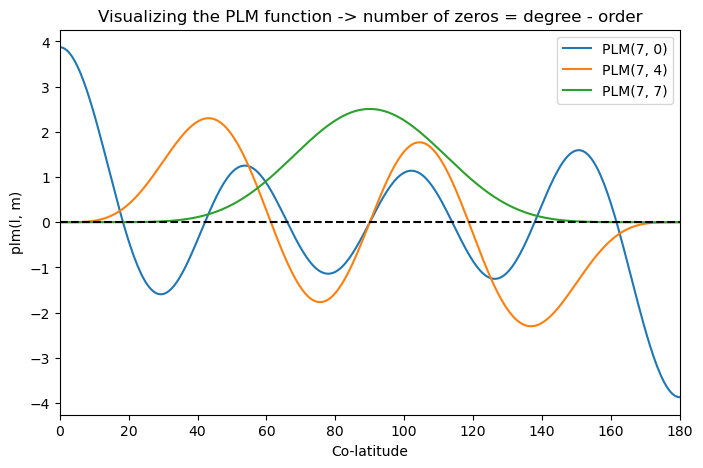

In [ ]:
# Plotting the plm 
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(np.rad2deg(colatitude), plm_7_0[:, 0, 0], label="PLM(7, 0)")
plt.plot(np.rad2deg(colatitude), plm_7_4[:, 0, 0], label="PLM(7, 4)")
plt.plot(np.rad2deg(colatitude), plm_7_7[:, 0, 0], label="PLM(7, 7)")

plt.hlines(y=0, xmin=0, xmax=180, linestyles='--', colors='k')
plt.xlim([0, 180])
plt.legend()

plt.title("Visualizing the PLM function -> number of zeros = degree - order")
plt.xlabel("Co-latitude")
plt.ylabel("plm(l, m)")

plt.show()

## Check Orthogonality of Spherical Harmonic Coefficients

Refering to Stack Overflow post - https://stackoverflow.com/questions/39537794/orthogonality-issue-in-scipys-legendre-polynomials

Great GitHub Repo by @markmbaum for 2-D Orthogonal Spherical Harmonic. Find the docs for `orthopoly` - https://markmbaum.github.io/orthopoly/

## Visualizing the orthogonality of Legendre Polynomial

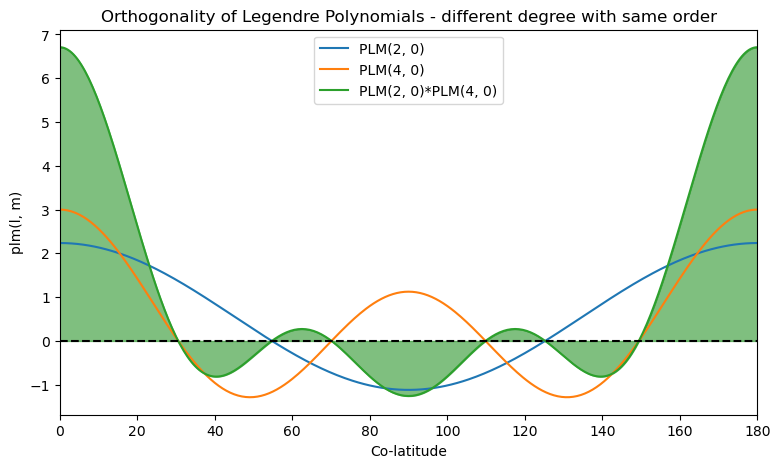

In [ ]:
# the plm implementation using a co-latitude vector (geodetic use-case)
l1 = np.zeros((1,1))
l1[0] = 2

l2 = np.zeros((1,1))
l2[0] = 4


colatitude = np.deg2rad(np.arange(0, 180.5, 0.5))

plm_2_0 = pyshbundle.plm.plm(l=l1, m=0, thetaRAD=colatitude, nargin=1, nargout=1)
plm_4_0 = pyshbundle.plm.plm(l=l2, m=0, thetaRAD=colatitude, nargin=1, nargout=1)

product_2_4 = plm_2_0*plm_4_0

# Plotting the plm 
fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(np.rad2deg(colatitude), plm_2_0[:, 0, 0], label="PLM(2, 0)")
plt.plot(np.rad2deg(colatitude), plm_4_0[:, 0, 0], label="PLM(4, 0)")

plt.plot(np.rad2deg(colatitude), product_2_4[:, 0, 0], label="PLM(2, 0)*PLM(4, 0)")

plt.fill_between(np.rad2deg(colatitude),product_2_4[:, 0, 0],color='green',alpha=0.5)

plt.hlines(y=0, xmin=0, xmax=180, linestyles='--', colors='k')
plt.xlim([0, 180])
plt.legend()

plt.title("Orthogonality of Legendre Polynomials - different degree with same order")
plt.xlabel("Co-latitude")
plt.ylabel("plm(l, m)")

plt.show()

It can be observed that the product of PLM(2,0) and PLM4(4,0) yields a output symmetric about X-axis and also about co-latitude = 90 deg. Thus area under 
the plot turns out to be zero -> both are orthogonal functions

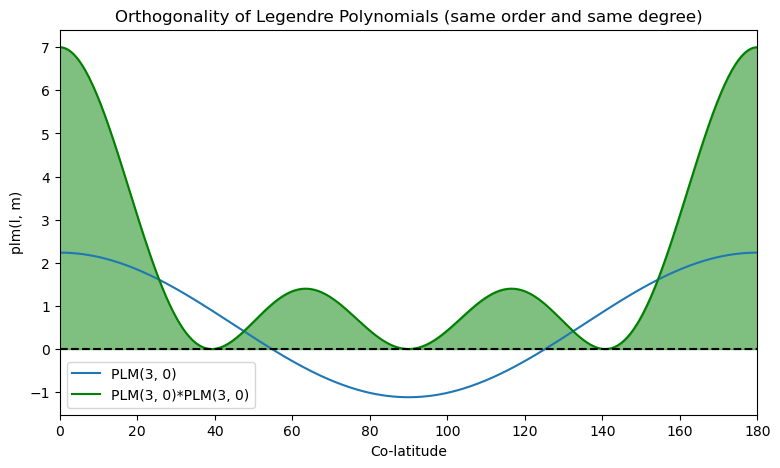

In [ ]:
# the plm implementation using a co-latitude vector (geodetic use-case)

l3 = np.zeros((1,1))
l3[0] = 3

colatitude = np.deg2rad(np.arange(0, 180.5, 0.5))

plm_3_0 = pyshbundle.plm.plm(l=l3, m=0, thetaRAD=colatitude, nargin=1, nargout=1)

product_3_3 = plm_3_0*plm_3_0

# Plotting the plm 
fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(np.rad2deg(colatitude), plm_2_0[:, 0, 0], label="PLM(3, 0)")

plt.plot(np.rad2deg(colatitude), product_3_3[:, 0, 0], label="PLM(3, 0)*PLM(3, 0)", color='green')

plt.fill_between(np.rad2deg(colatitude),product_3_3[:, 0, 0],color='green',alpha=0.5)

plt.hlines(y=0, xmin=0, xmax=180, linestyles='--', colors='k')
plt.xlim([0, 180])
plt.legend()

plt.title("Orthogonality of Legendre Polynomials (same order and same degree)")
plt.xlabel("Co-latitude")
plt.ylabel("plm(l, m)")

plt.show()

In this case the integral cannot be zero, its some finite positive quantity.

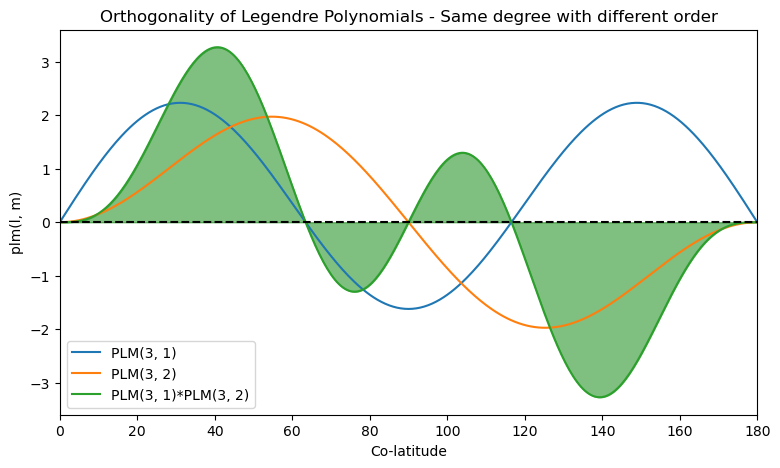

In [ ]:
# the plm implementation using a co-latitude vector (geodetic use-case)
l1 = np.zeros((1,1))
l1[0] = 3

l2 = np.zeros((1,1))
l2[0] = 3


colatitude = np.deg2rad(np.arange(0, 180.5, 0.5))

plm_3_1 = pyshbundle.plm.plm(l=l1, m=1, thetaRAD=colatitude, nargin=1, nargout=1)
plm_3_0 = pyshbundle.plm.plm(l=l2, m=2, thetaRAD=colatitude, nargin=1, nargout=1)

product_33_10 = plm_3_1*plm_3_0

# Plotting the plm 
fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(np.rad2deg(colatitude), plm_3_1[:, 0, 0], label="PLM(3, 1)")
plt.plot(np.rad2deg(colatitude), plm_3_0[:, 0, 0], label="PLM(3, 2)")

plt.plot(np.rad2deg(colatitude), product_33_10[:, 0, 0], label="PLM(3, 1)*PLM(3, 2)")

plt.fill_between(np.rad2deg(colatitude),product_33_10[:, 0, 0],color='green',alpha=0.5)

plt.hlines(y=0, xmin=0, xmax=180, linestyles='--', colors='k')
plt.xlim([0, 180])
plt.legend()

plt.title("Orthogonality of Legendre Polynomials - Same degree with different order")
plt.xlabel("Co-latitude")
plt.ylabel("plm(l, m)")

plt.show()

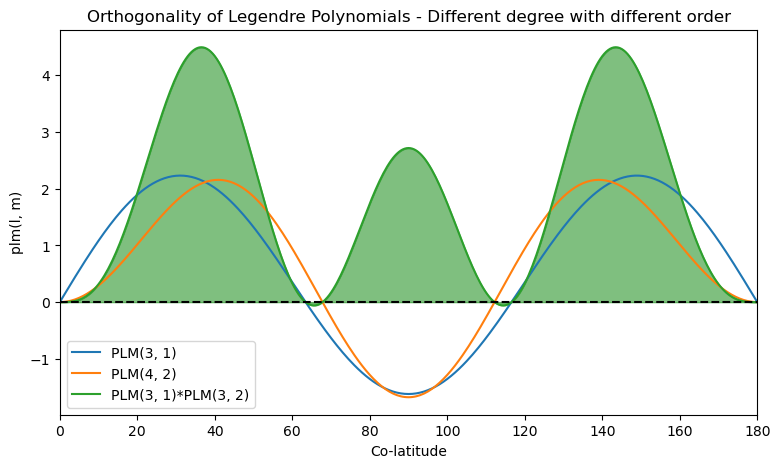

In [ ]:
# the plm implementation using a co-latitude vector (geodetic use-case)
l1 = np.zeros((1,1))
l1[0] = 3

l2 = np.zeros((1,1))
l2[0] = 4


colatitude = np.deg2rad(np.arange(0, 180.5, 0.5))

plm_3_1 = pyshbundle.plm.plm(l=l1, m=1, thetaRAD=colatitude, nargin=1, nargout=1)
plm_3_0 = pyshbundle.plm.plm(l=l2, m=2, thetaRAD=colatitude, nargin=1, nargout=1)

product_33_10 = plm_3_1*plm_3_0

# Plotting the plm 
fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(np.rad2deg(colatitude), plm_3_1[:, 0, 0], label="PLM(3, 1)")
plt.plot(np.rad2deg(colatitude), plm_3_0[:, 0, 0], label="PLM(4, 2)")

plt.plot(np.rad2deg(colatitude), product_33_10[:, 0, 0], label="PLM(3, 1)*PLM(3, 2)")

plt.fill_between(np.rad2deg(colatitude),product_33_10[:, 0, 0],color='green',alpha=0.5)

plt.hlines(y=0, xmin=0, xmax=180, linestyles='--', colors='k')
plt.xlim([0, 180])
plt.legend()

plt.title("Orthogonality of Legendre Polynomials - Different degree with different order")
plt.xlabel("Co-latitude")
plt.ylabel("plm(l, m)")

plt.show()

The shaded regions if symmetric (such that sum=0) indicates that both the polynomials are orthogonal. Else both the functions are not symmetric.

## Surface Spherical Harmonics

similar to the plm and plmplot in SHBundle

$$

$$

In [ ]:
import pyshbundle.plm

def surface_spherical_hormonics(l: int, m: int):
    """_summary_

    Args:
        l (int): Degree
        m (int): Order

    Returns:
        _type_: _description_
    """

    # input handling
    assert l >= 0

    assert m >= 0

    assert m <= l

    # main code
    thetaRAD  = np.linspace(0,np.pi,37)
    lambdaRAD = np.linspace(0,2*np.pi,73)

    cosml = np.cos(m*lambdaRAD)
    sinml = np.sin(m*lambdaRAD)

    arr = np.zeros((1,1))
    arr[0] = l
    
    
    p = pyshbundle.plm.plm(arr, m, thetaRAD, nargin=1, nargout=1)

    ylmc = p * cosml
    ylms = p * sinml

    return (ylmc, ylms)

In [ ]:
ylmc, ylms = surface_spherical_hormonics(l=2, m=1)

In [ ]:
ylmc.shape

(37, 1, 73)

In [ ]:
np.linspace(0,np.pi,37)

array([0.        , 0.08726646, 0.17453293, 0.26179939, 0.34906585,
       0.43633231, 0.52359878, 0.61086524, 0.6981317 , 0.78539816,
       0.87266463, 0.95993109, 1.04719755, 1.13446401, 1.22173048,
       1.30899694, 1.3962634 , 1.48352986, 1.57079633, 1.65806279,
       1.74532925, 1.83259571, 1.91986218, 2.00712864, 2.0943951 ,
       2.18166156, 2.26892803, 2.35619449, 2.44346095, 2.53072742,
       2.61799388, 2.70526034, 2.7925268 , 2.87979327, 2.96705973,
       3.05432619, 3.14159265])

In [ ]:
l = 2
m = 1


nlam   = min(400,(abs(m)+1)*100)
ntet   = min(200,(l-abs(m)+2)*50)

lmbda = np.linspace(-np.pi,np.pi,nlam)
theta  = np.linspace(0,np.pi,ntet)'

[Lam,The] = np.meshgrid(lmbda,theta)

[X,Y,Z] = sph2cart(Lam, np.pi/2-The,1)
hs   = surf(X,Y,Z,y); shading interp
axis equal; axis off
lamTitle = true

SyntaxError: unterminated string literal (detected at line 9) (2382800875.py, line 9)

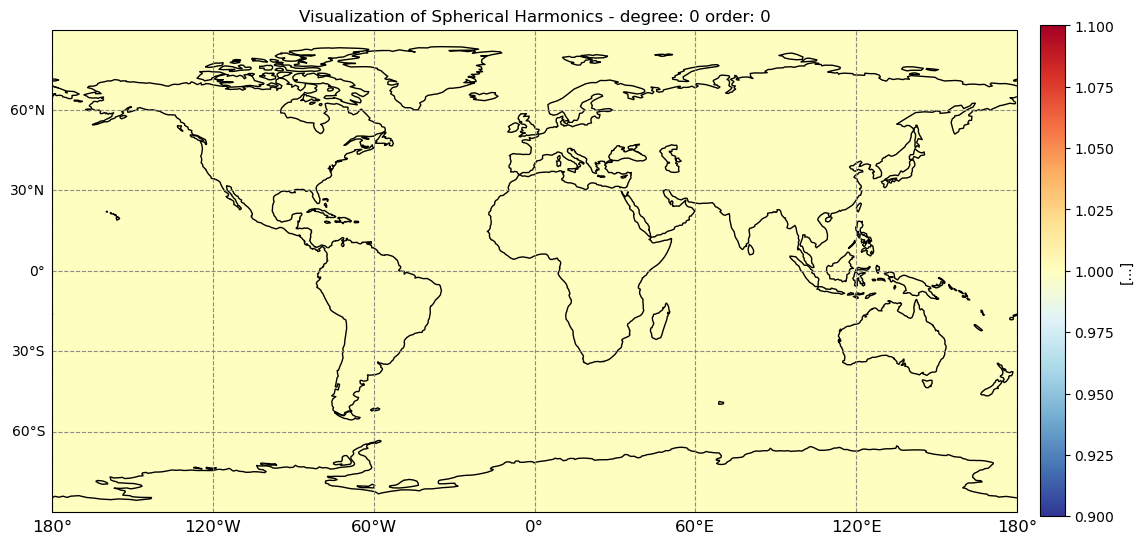

In [ ]:
# basic plotting of SH coeff on plane
l = 0
m = 0

ylmc_00, ylms_00 = surface_spherical_hormonics(l=l, m=m)

fig = plt.figure(figsize=(15, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())

lons = np.linspace(-180, 180, 73)
lats = np.linspace(-90, 90, 37)

x, y = np.meshgrid(lons, lats)

if m >=0 :

    img_extent = (-180, 180, -90, 90)

    # plot the data
    im = ax.imshow(ylmc_00[:, 0, :], origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),)
else:
    plt.contourf(x, y, ylms_00[:, 0, :], cmap='RdYlBu_r')


# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

plt.colorbar(im, orientation='vertical', shrink=0.85, pad=0.02,label=f"[...]")

plt.title(f"Visualization of Spherical Harmonics - degree: {l} order: {m}")
plt.show()


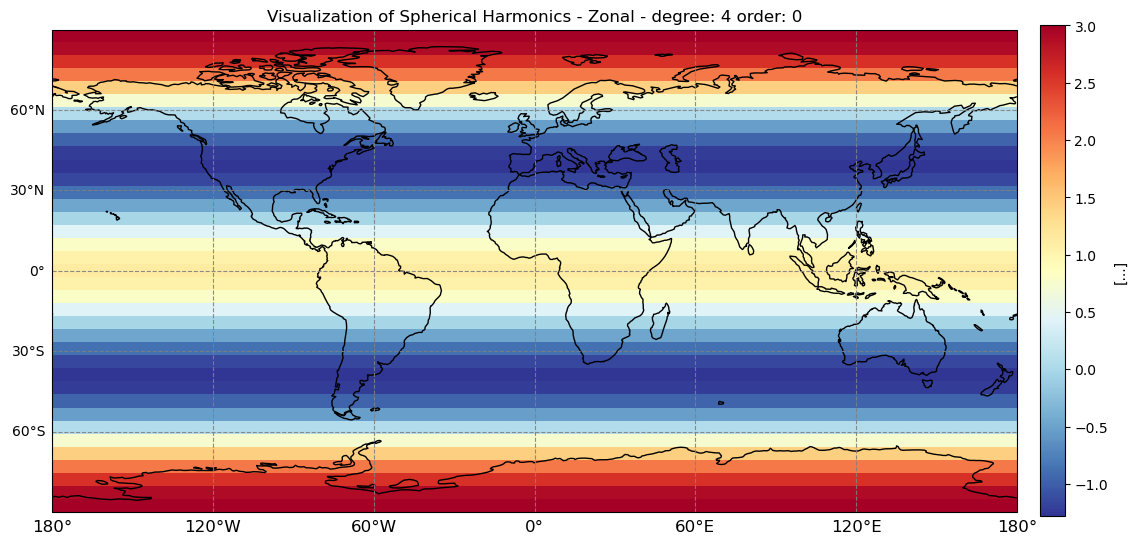

In [ ]:
# basic plotting of SH coeff on plane - Zonal
l = 4
m = 0

ylmc_40, ylms_40 = surface_spherical_hormonics(l=l, m=m)

fig = plt.figure(figsize=(15, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())

lons = np.linspace(-180, 180, 73)
lats = np.linspace(-90, 90, 37)

x, y = np.meshgrid(lons, lats)

max_level = 2.4
min_level = -2.4
step_level = 0.1

if m >= 0 :
    #plt.contourf(x, y, ylmc_40[:, 0, :], cmap='RdYlBu_r', levels = np.arange(min_level, max_level + step_level, step_level))
    img_extent = (-180, 180, -90, 90)

    # plot the data
    im = ax.imshow(ylmc_40[:, 0, :], origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),)
else:
    plt.contourf(x, y, ylms[:, 0, :], cmap='RdYlBu_r')


# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

plt.colorbar(im, orientation='vertical', shrink=0.85, pad=0.02,label=f"[...]")

plt.title(f"Visualization of Spherical Harmonics - Zonal - degree: {l} order: {m}")
plt.show()


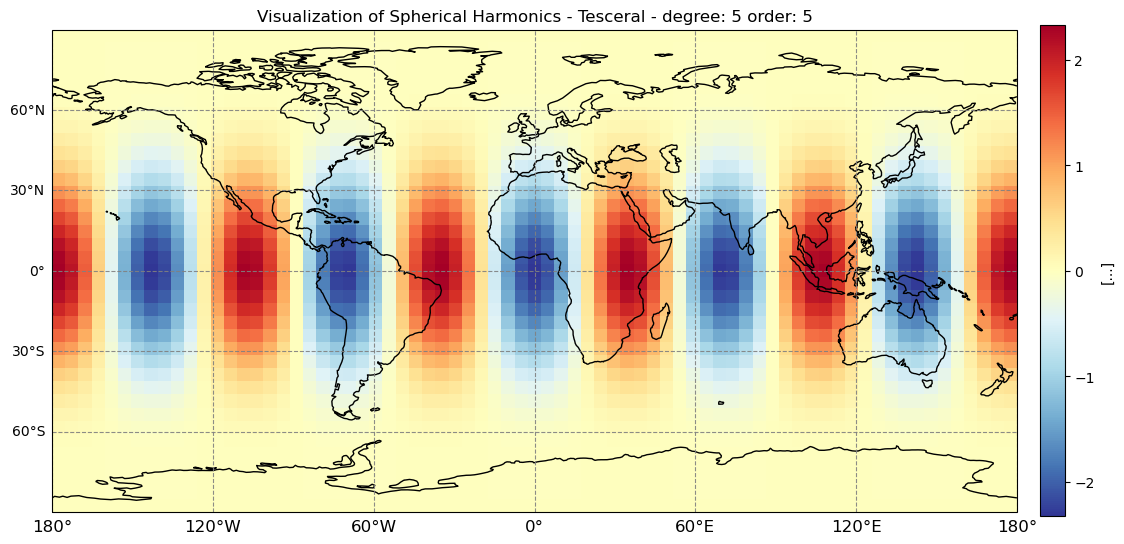

In [ ]:
# basic plotting of SH coeff on plane - Teseral
l = 5
m = 5

ylmc_55, ylms_55 = surface_spherical_hormonics(l=l, m=m)

fig = plt.figure(figsize=(15, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())

lons = np.linspace(-180, 180, 73)
lats = np.linspace(-90, 90, 37)

x, y = np.meshgrid(lons, lats)

max_level = 2.4
min_level = -2.4
step_level = 0.1

if m >=0 :
    # plt.contourf(x, y, ylmc_55[:, 0, :], cmap='RdYlBu_r', levels = np.arange(min_level, max_level + step_level, step_level))
    img_extent = (-180, 180, -90, 90)

    # plot the data
    im = ax.imshow(ylmc_55[:, 0, :], origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),)
    
else:
    plt.contourf(x, y, ylms[:, 0, :], cmap='RdYlBu_r')


# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

plt.colorbar(im, orientation='vertical', shrink=0.85, pad=0.02,label=f"[...]")

plt.title(f"Visualization of Spherical Harmonics - Tesceral - degree: {l} order: {m}")
plt.show()


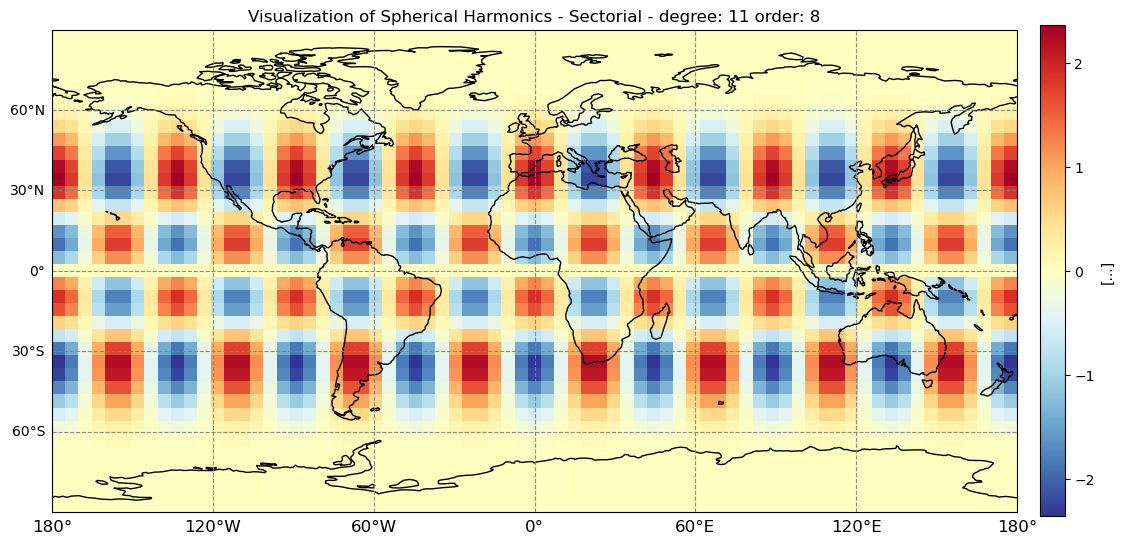

In [ ]:
# basic plotting of SH coeff on plane - Sectoral
l = 11
m = 8

ylmc_11_8, ylms_11_8 = surface_spherical_hormonics(l=l, m=m)

fig = plt.figure(figsize=(15, 7.5))
ax = plt.axes(projection = ccrs.PlateCarree())

lons = np.linspace(-180, 180, 73)
lats = np.linspace(-90, 90, 37)

x, y = np.meshgrid(lons, lats)

max_level = 2.4
min_level = -2.4
step_level = 0.1

if m >=0 :
    #plt.contourf(x, y, ylmc_11_8[:, 0, :], cmap='RdYlBu_r', levels = np.arange(min_level, max_level + step_level, step_level))
    img_extent = (-180, 180, -90, 90)

    # plot the data
    im = ax.imshow(ylmc_11_8[:, 0, :], origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),)
else:
    plt.contourf(x, y, ylms[:, 0, :], cmap='RdYlBu_r')


# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

plt.colorbar(im, orientation='vertical', shrink=0.85, pad=0.02,label=f"[...]")

plt.title(f"Visualization of Spherical Harmonics - Sectorial - degree: {l} order: {m}")
plt.show()


In [ ]:
# Initial spherical harmonic coeff

degree = sh_clm[0]
order = sh_clm[1]
clm = sh_clm[2]
slm = sh_clm[3]



In [ ]:
print(f"Degree:{degree[0][1]}; Order:{order[0][1]}")

Degree:1; Order:0


In [ ]:
C00 = clm[0][0]
C10 = clm[0][1]
C55 = clm[0][20]
C11_8 = clm[0][77]

print(f"C00: {C00},    C10: {C10},     C55: {C55},     C11_8: {C11_8}")

C00: 0.0,    C10: 4.935091508e-10,     C55: 1.74787513721e-07,     C11_8: 4.62309781271e-08


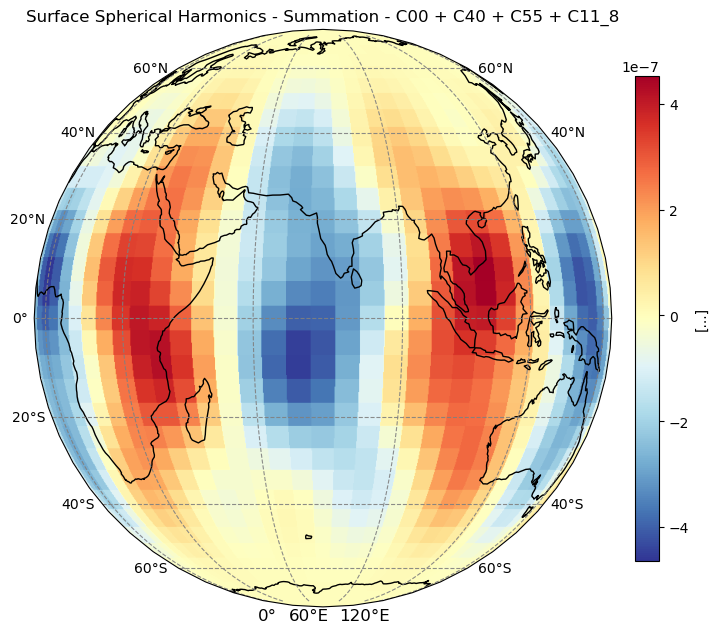

In [ ]:
# Summing SH Coeff C00 + C10 + S0-1 + C01
# basic plotting of SH coeff on plane - Sectoral
l = 2
m = 2

ylmc = C00*ylmc_00 + C10*ylmc_40 + C55*ylmc_55 + C11_8*ylmc_11_8

fig = plt.figure(figsize=(15, 7.5))
ax = plt.axes(projection = ccrs.Orthographic(central_longitude=74.0, central_latitude=0.0, globe=None))

lons = np.linspace(-180, 180, 73)
lats = np.linspace(-90, 90, 37)

# max_level = 6
# min_level = -4.5
# step_level = 0.1
# levels = np.arange(min_level, max_level + step_level, step_level)
x, y = np.meshgrid(lons, lats)

if m >=0 :
    # plt.contourf(x, y, ylmc[:, 0, :], cmap='RdYlBu_r', )
    img_extent = (-180, 180, -90, 90)

    # plot the data
    im = ax.imshow(ylmc[:, 0, :], origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),)
else:
    plt.contourf(x, y, ylms[:, 0, :], cmap='RdYlBu_r')


# setting gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
# remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
ax.coastlines()

plt.colorbar(im, orientation='vertical', shrink=0.84, pad=0.02,label=f"[...]")

plt.title(f"Surface Spherical Harmonics - Summation - C00 + C40 + C55 + C11_8")
plt.show()


## Power Spectrum of Spherical harmonics